In [ ]:
Capstone Project:
This dataset contains 15,000 records of individuals, likely from a financial institution, and includes information typically used to assess credit or loan risk. Each row represents a loan or credit applicant, and the columns include demographic, financial, employment, and behavioral features.

In [ ]:
Step 1: Understand and read the Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_csv(r'C:\Users\liliz\OneDrive\Desktop\AI and ML\Berkeley Certificate\Capstone Project\financial_risk_assessment.csv\financial_risk_assessment.csv')

In [5]:
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [6]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [ ]:
Step 2: Understanding the features

In [ ]:
Input variables:
1 - age (numeric)
2 - gender : (categorical: 'Male','Female','Non-binary')
3 - education : (categorical: 'PhD','Bachelor's','Master's','High School')
4 - Marital Status (categorical: 'Divorced','Widowed','Single','Married')
5 - Income: (numeric)
6 - Credit Score: (numeric)
7 - Loan Amount: (numeric)
8 - Loan Purpose: (categorical: 'Business','Auto','Personal','Home')
9 - Employment Status(categorical: 'Unemployed', 'Employed', 'Self-employed')
10 - Years at Current Job (numeric)
11 - Payment History : (categorical:'Poor', 'Fair', 'Excellent', 'Good')
12 - Debt-to-Income Ratio (numeric)
13 - Number of Dependents (numeric)
14 - City
15 - State
16 - Country
17 - Previous Defaults (numeric)
18 - Marital Status Change (numeric)

Output variable:
Risk Rating: (categorical: 'Low', 'Medium', 'High')



In [7]:
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 15000 rows and 20 columns.


In [8]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  

In [9]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [10]:
print("\nNumber of unique values per column:")
display(df.nunique())


Number of unique values per column:


Age                         52
Gender                       3
Education Level              4
Marital Status               4
Income                   11957
Credit Score               200
Loan Amount              11088
Loan Purpose                 4
Employment Status            3
Years at Current Job        20
Payment History              4
Debt-to-Income Ratio     15000
Assets Value             12470
Number of Dependents         5
City                     10614
State                       59
Country                    243
Previous Defaults            5
Marital Status Change        3
Risk Rating                  3
dtype: int64

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change']

Categorical columns:
['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 'Payment History', 'City', 'State', 'Country', 'Risk Rating']


In [12]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
Risk Rating               object
dtype: object


In [ ]:
Step 3: Clean the data

In [13]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Drop columns with too many missing values (example threshold: >50%)
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.5].index
df = df.drop(columns=cols_to_drop)

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Standardize categorical strings (lowercase, strip spaces)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()


print("Missing and inconsistent data handled.")

Missing values per column:


Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

Missing and inconsistent data handled.


C:\Users\liliz\AppData\Local\Temp\ipykernel_33784\624450938.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  float64
 5   Credit Score           15000 non-null  float64
 6   Loan Amount            15000 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  float64
 13  Number of Dependents   15000 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [ ]:
Step 4: Engineering Features

In [15]:
# New feature: Loan-to-Income ratio
df['Loan_to_Income'] = df['Loan Amount'] / (df['Income'] + 1e-6)  # avoid div by zero

# Bin credit score
df['Credit_Score_Bin'] = pd.cut(df['Credit Score'], 
                                bins=[300, 580, 670, 740, 800, 850],
                                labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# Bin age
df['Age_Bin'] = pd.cut(df['Age'], 
                       bins=[18, 30, 45, 60, 100],
                       labels=['Young', 'Mid-Age', 'Adult', 'Senior'])

In [ ]:
 Step 5: Encode categorical variables

In [18]:
# Convert Categorical to string for LabelEncoder
df['Credit_Score_Bin'] = df['Credit_Score_Bin'].astype(str)
df['Age_Bin'] = df['Age_Bin'].astype(str)

# Encode all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
 Step 6: Train/test split and model training

In [19]:
# Define input and output
X = df.drop(columns=['Risk Rating'])
y = df['Risk Rating']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train baseline RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [20]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.588

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.59      0.99      0.74      1779
           2       0.26      0.01      0.02       895

    accuracy                           0.59      3000
   macro avg       0.29      0.33      0.25      3000
weighted avg       0.43      0.59      0.45      3000



In [ ]:
Step 7: Exploratory Data Analysis (EDA)

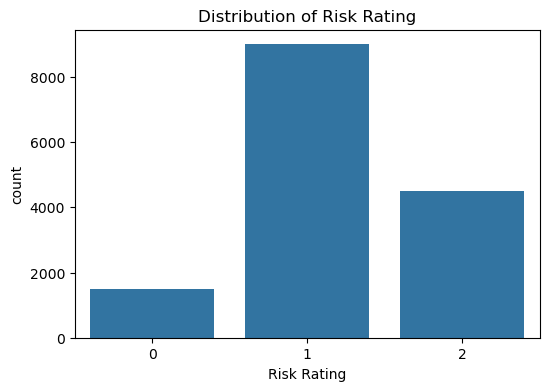

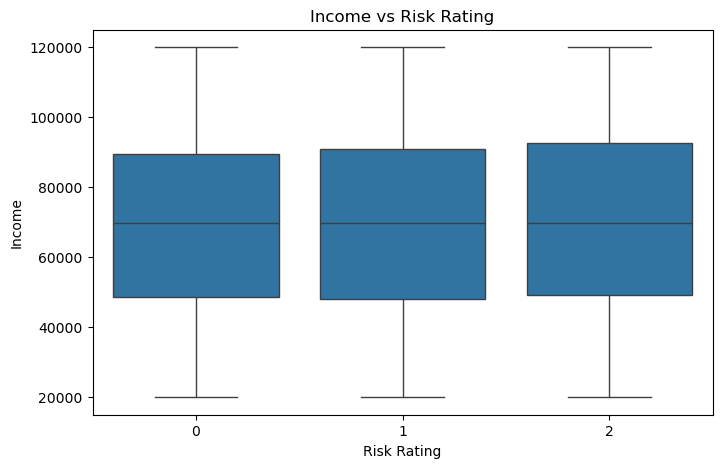

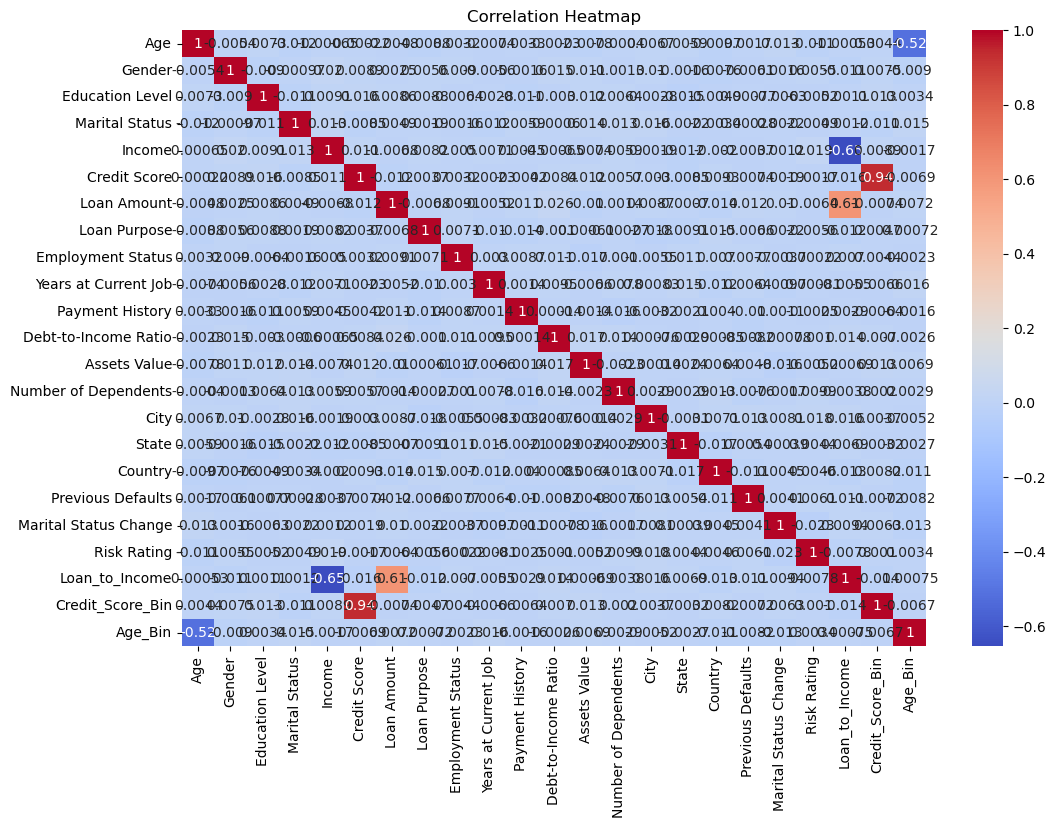

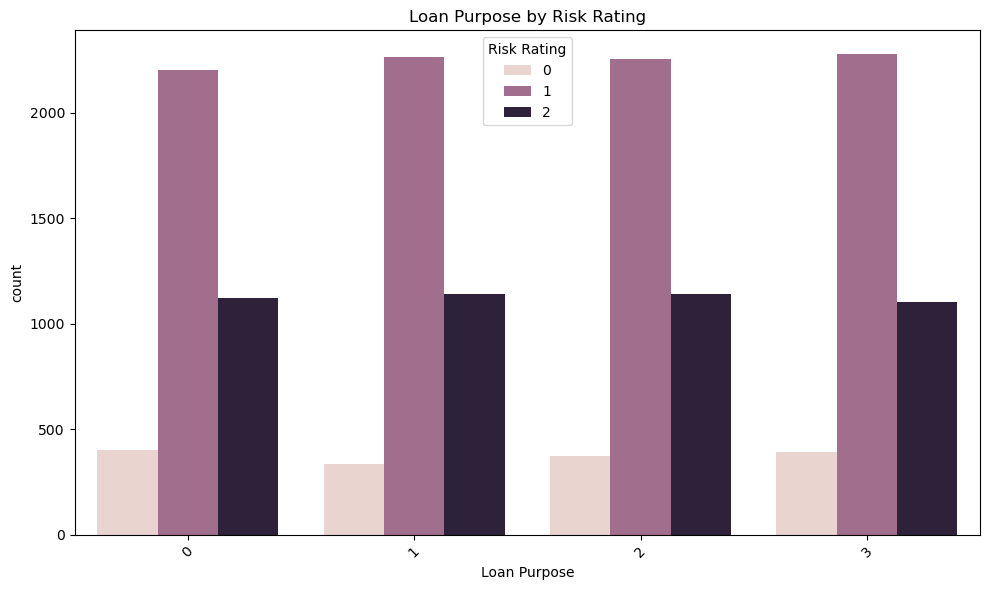

In [21]:
# Plot: Risk Rating Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Rating')
plt.show()

# Plot: Income vs Risk
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk Rating', y='Income', data=df)
plt.title('Income vs Risk Rating')
plt.show()

# Plot: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Plot: Loan Purpose vs Risk
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan Purpose', hue='Risk Rating', data=df)
plt.title('Loan Purpose by Risk Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()